In [1]:
import pandas as pd

data_path = "tahkeer_data.csv"
all_data = pd.read_csv(data_path)

# nicotine dependency, carbon monoxide levels, daily cigarette consumption, age of
# smoking initiation, previous quit attempts, emotional well-being, personality traits, and motivation to
# quit

columns = all_data.columns.tolist()[1:]
columns.remove("smoking")

columns

['weight(kg)',
 'HDL',
 'hearing(left)',
 'triglyceride',
 'fasting blood sugar',
 'Cholesterol',
 'LDL',
 'AST',
 'Gtp',
 'eyesight(left)',
 'waist(cm)',
 'hearing(right)',
 'serum creatinine',
 'dental caries',
 'systolic']

# Univariate Analysis

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import helpers as hlp
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Test


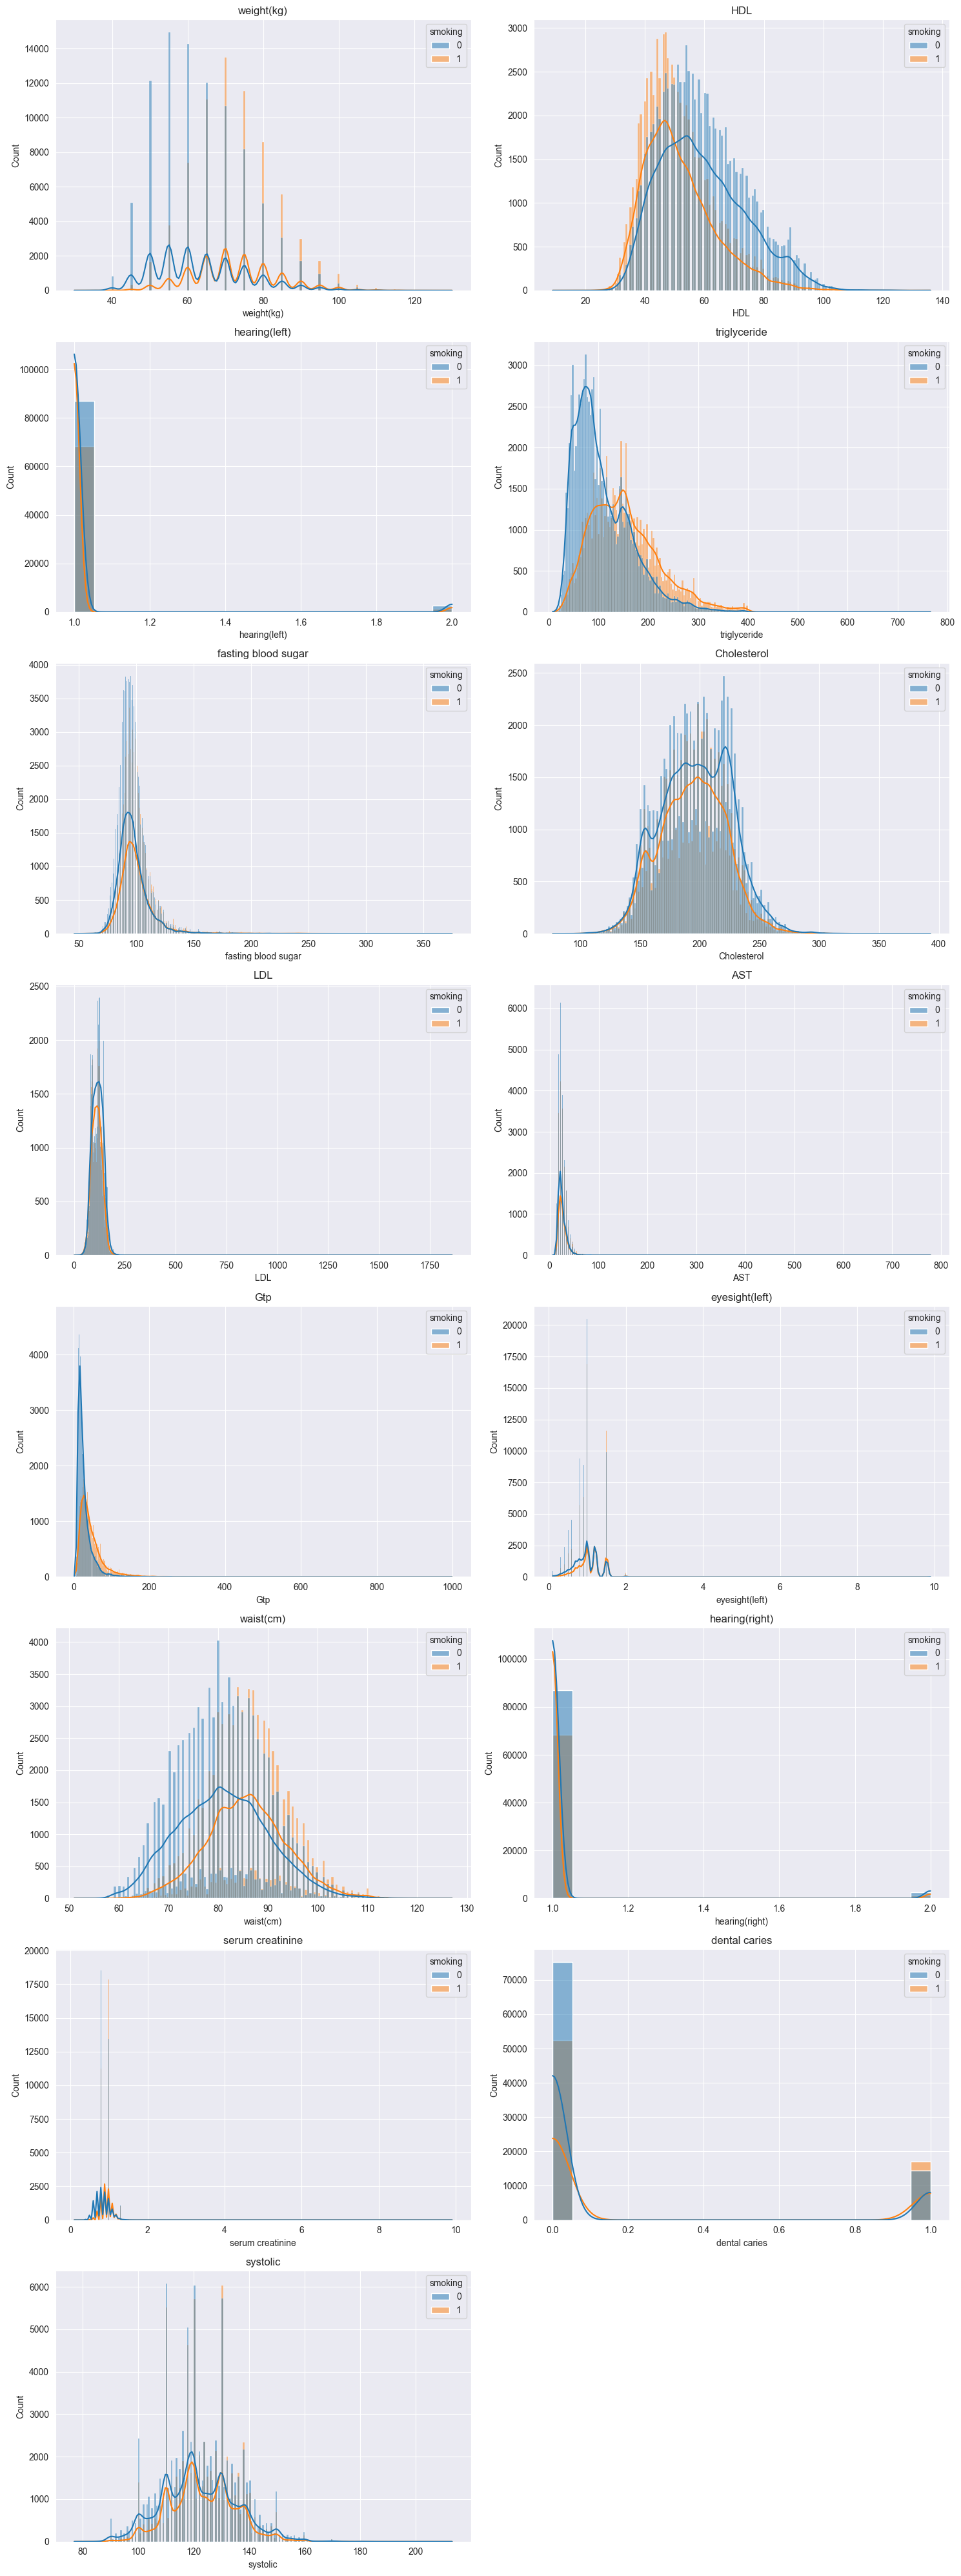

In [8]:
hlp.plot_histograms(all_data, columns, 2)

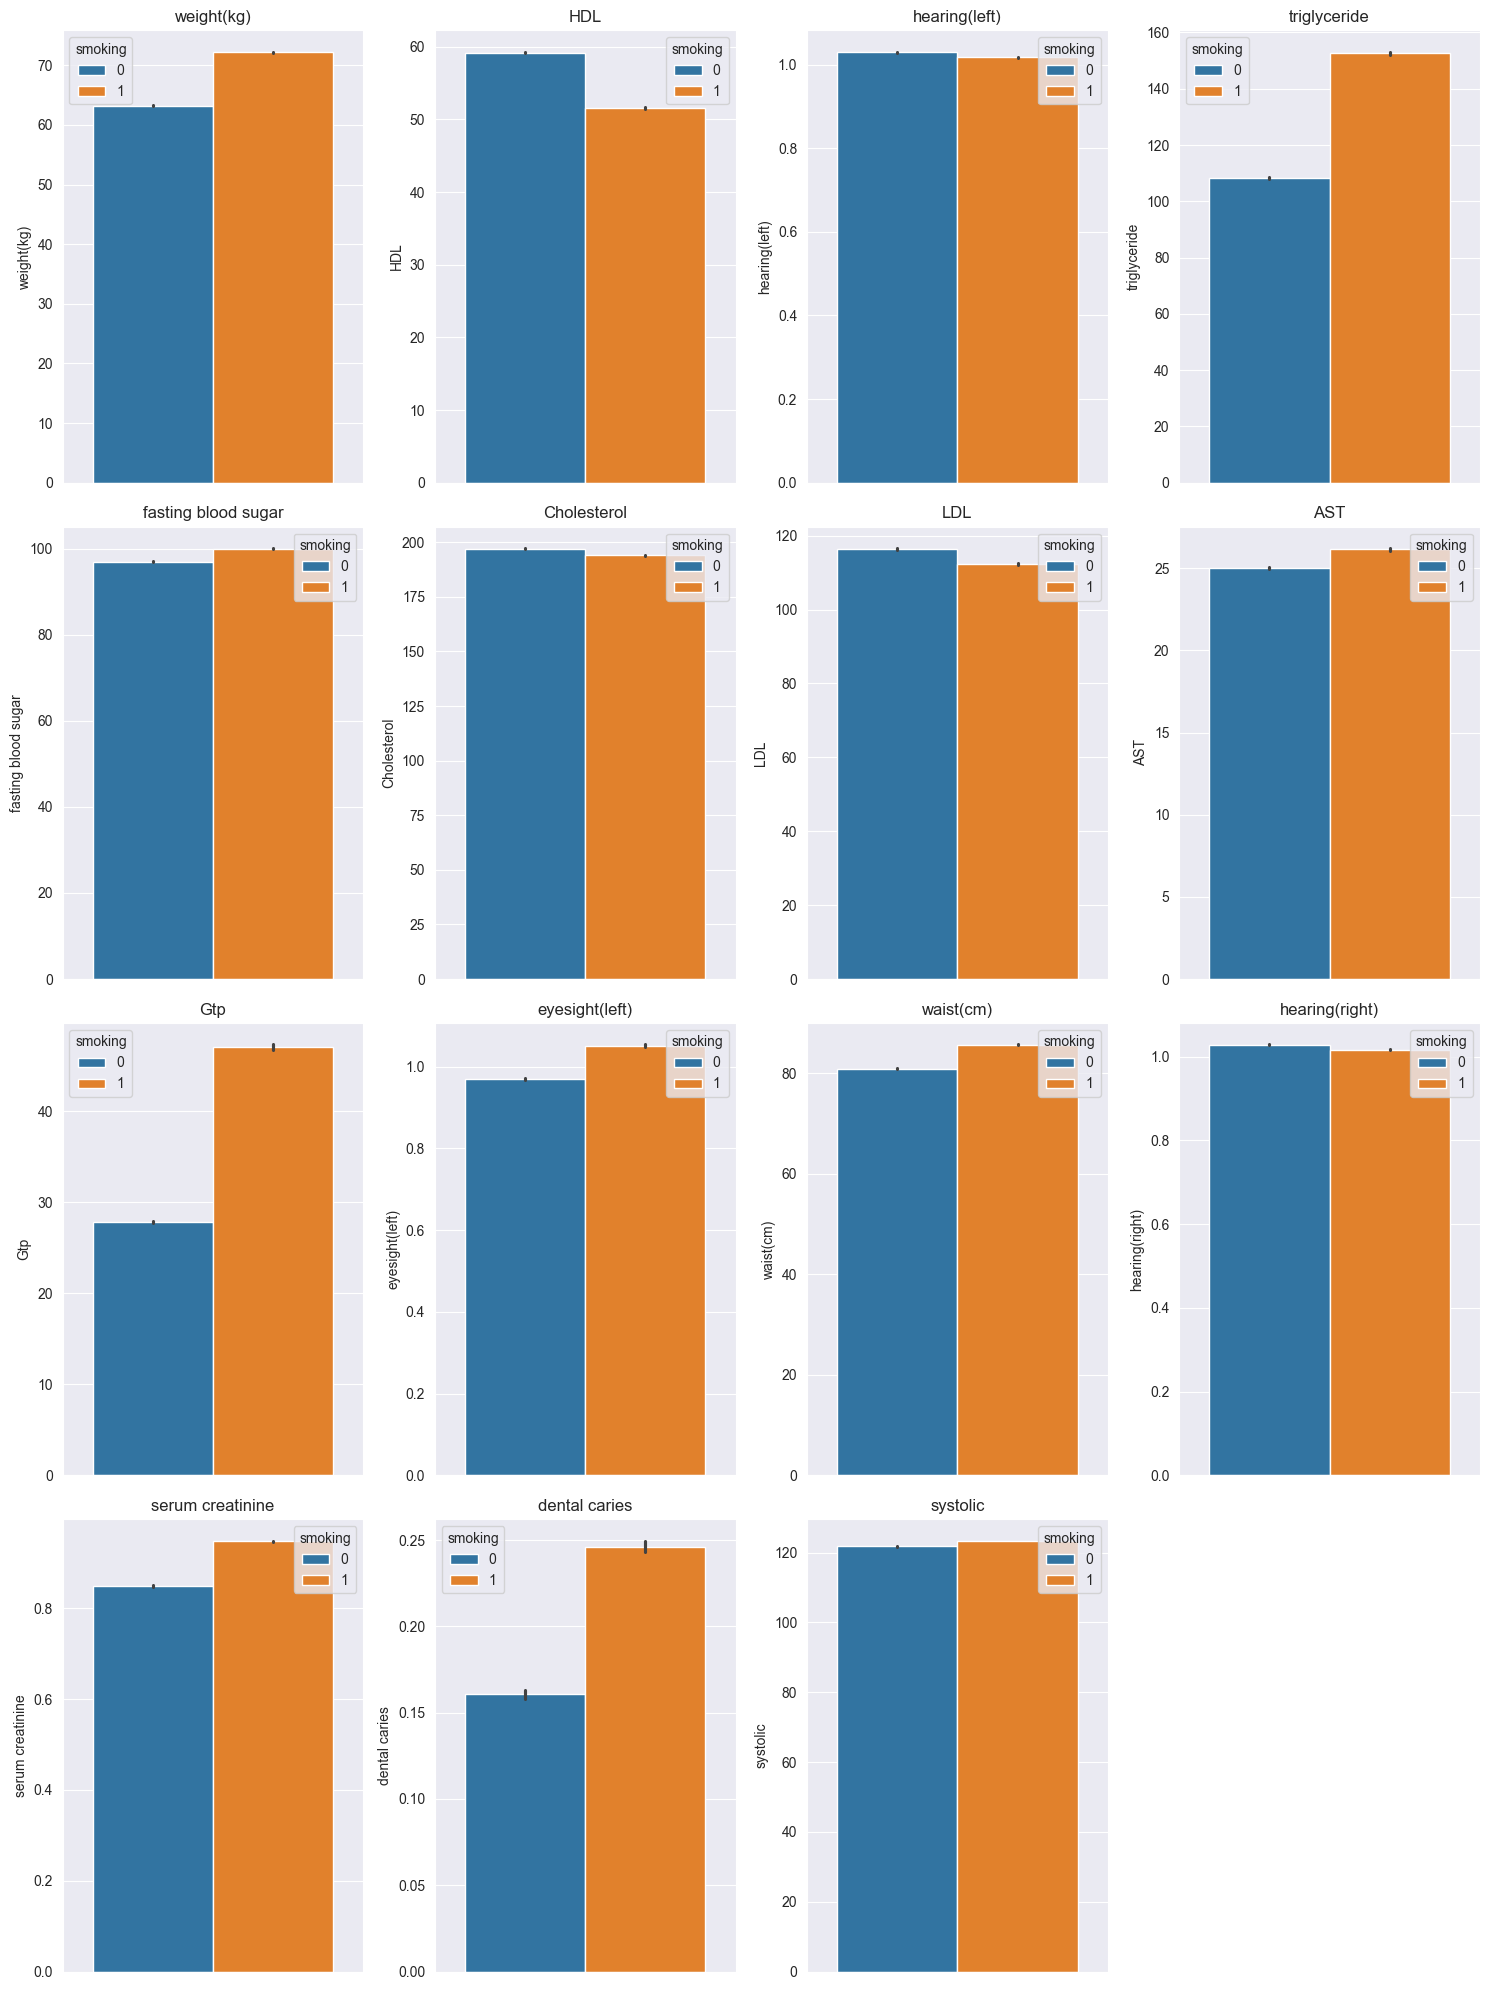

In [10]:
hlp.plot_bars(all_data, columns)

## Data analysis from normal distribution
We notice the following:
### Continuous variables
- Weight doesn't have a lot of outliers, but we can cut off from 40 to 100Kg
- HDL cholesterol has a lot of outliers, but we can cut off from 20 to 100
- Triglyceride has a lot of outliers, but we can cut off from 0 to 400
- Fasting blood sugar has a lot of outliers, but we can cut off from 60 to 150
- Cholesterol has a lot of outliers, but we can cut off from 100 to 300
- LDL cholesterol has a lot of outliers, but we can cut off from 20 to 250
- AST has a lot of outliers, but we can cut off from 0 to 90
- GTP has a lot of outliers, but we can cut off from 0 to 180
- Eyesight has a lot of outliers, but we can cut off from 0 to 2
- waist has a lot of outliers, but we can cut off from 55 to 110
- serum creatinine has a lot of outliers, but we can cut off from 0 to 2
- systolic has a lot of outliers, but we can cut off from 80 to 170

### Categorial variables
- hearing (left)
- hearing (right)
- dental caries


# Bivariate Analysis
## Exploring the correlation between the variables

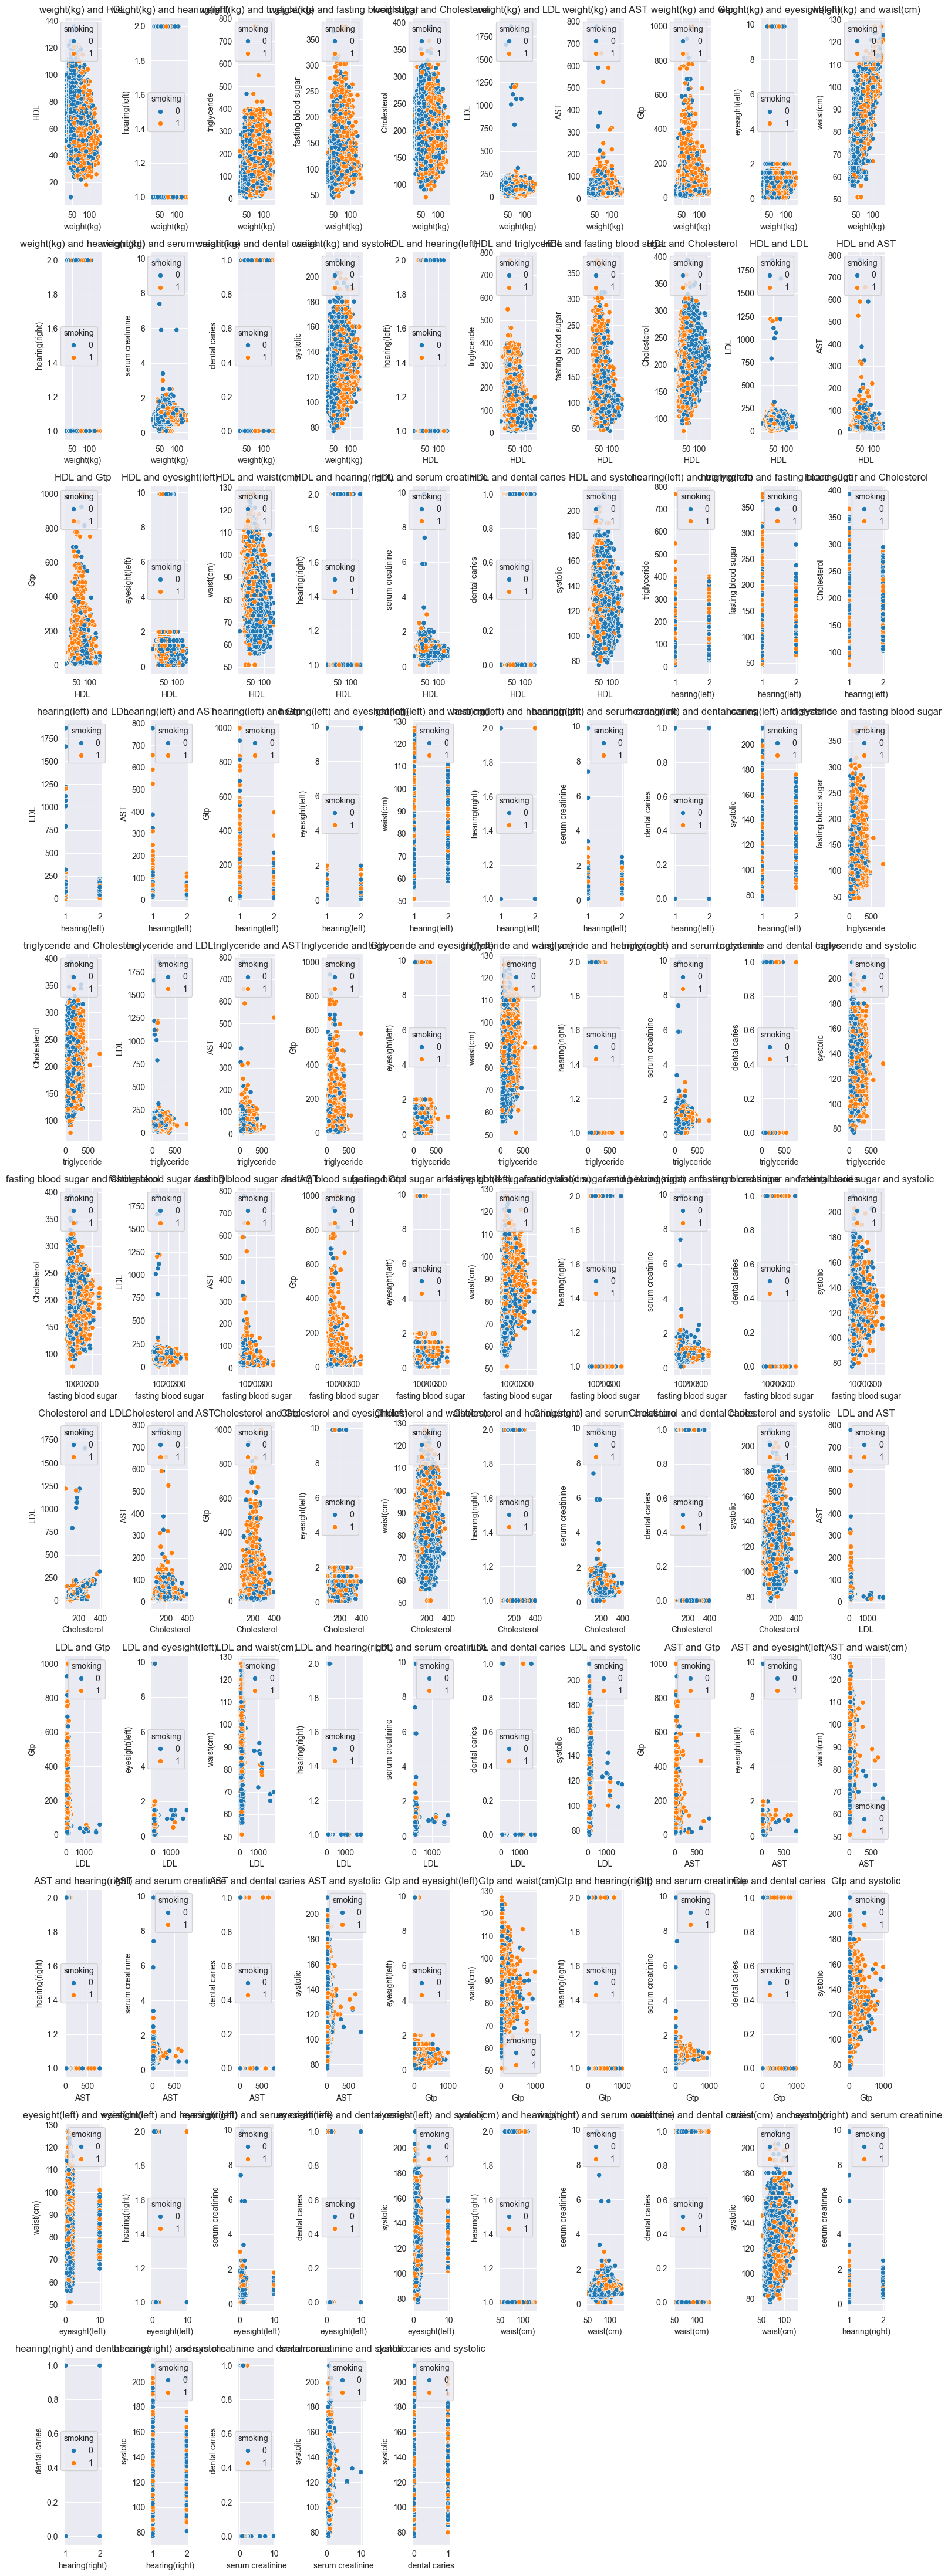

In [12]:
plots_per_row = 7
column_count = len(columns)
total_plots = column_count * (column_count - 1) // 2  # Total number of plots to be generated

# Calculate number of rows needed
rows = (total_plots + plots_per_row - 1) // plots_per_row

fig, axes = plt.subplots(rows, plots_per_row, figsize=(15, 4 * rows))

plot_count = 0
for i in range(column_count - 1):
    for j in range(i + 1, column_count):
        if rows > 1:
            ax = axes[plot_count // plots_per_row, plot_count % plots_per_row]
        else:
            ax = axes[plot_count % plots_per_row]
        
        feature_1 = columns[i]
        feature_2 = columns[j]
        
        sns.scatterplot(x=feature_1, y=feature_2, data=all_data, hue='smoking', ax=ax)
        ax.set_xlabel(feature_1)
        ax.set_ylabel(feature_2)
        ax.set_title(f'{feature_1} and {feature_2}')
        
        plot_count += 1

# Hide any unused subplots
for i in range(plot_count, rows * plots_per_row):
    if rows > 1:
        axes[i // plots_per_row, i % plots_per_row].axis('off')
    else:
        axes[i % plots_per_row].axis('off')

plt.tight_layout()
plt.show()

## Correlation Matrix
Looking at the correlation matrix we find the following:
- There is a strong correlation between weight and waist size
- There is a strong correlation between cholesterol and LDL
- There is a some correlation between AST and GTP
- There is a some correlation between triglyceride and weight-waist
- There is a some correlation between serum creatinine and weight

We also notice that there is a strong correlation between the following features and smoking:
- Weight
- Waist
- Serum creatinine
- Gtp
- Triglyceride

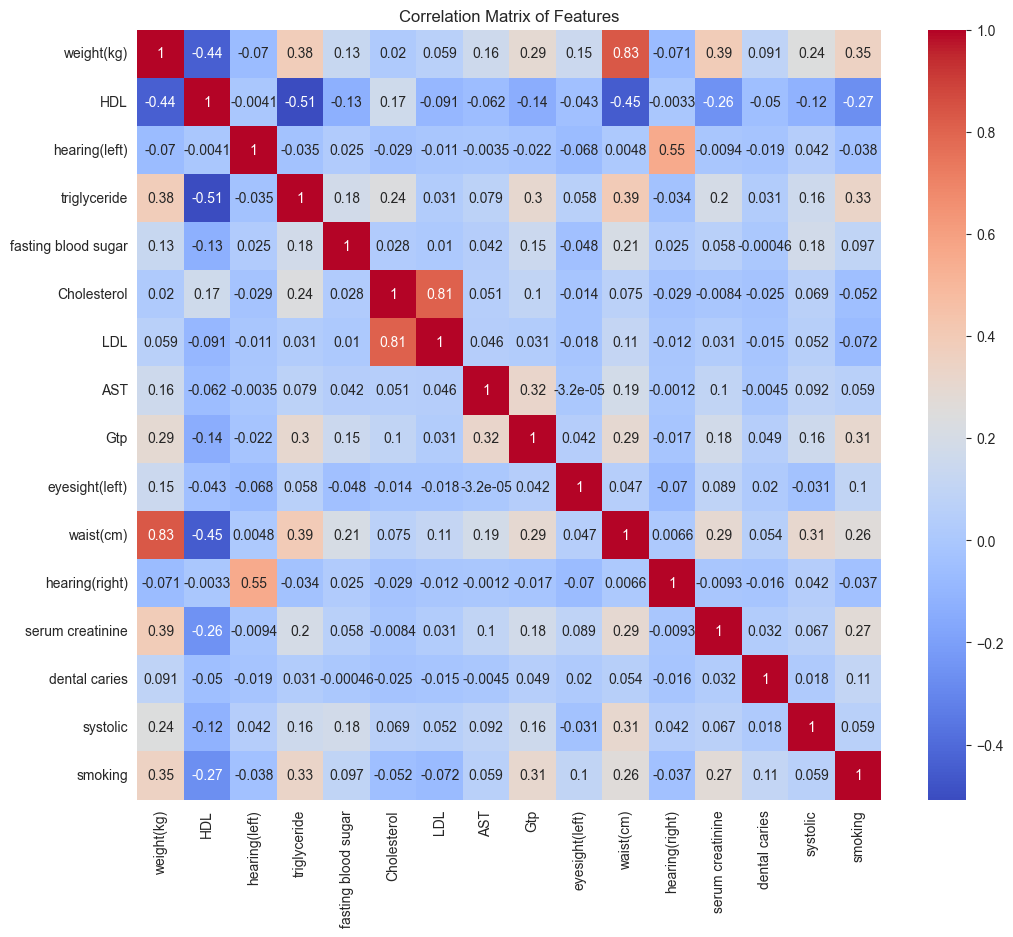

In [16]:
# Creating a correlation matrix for all features
correlation_matrix = all_data[columns+['smoking']].corr()

# Visualizing the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()

# Multivariate Analysis

/Library/Python/3.9/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


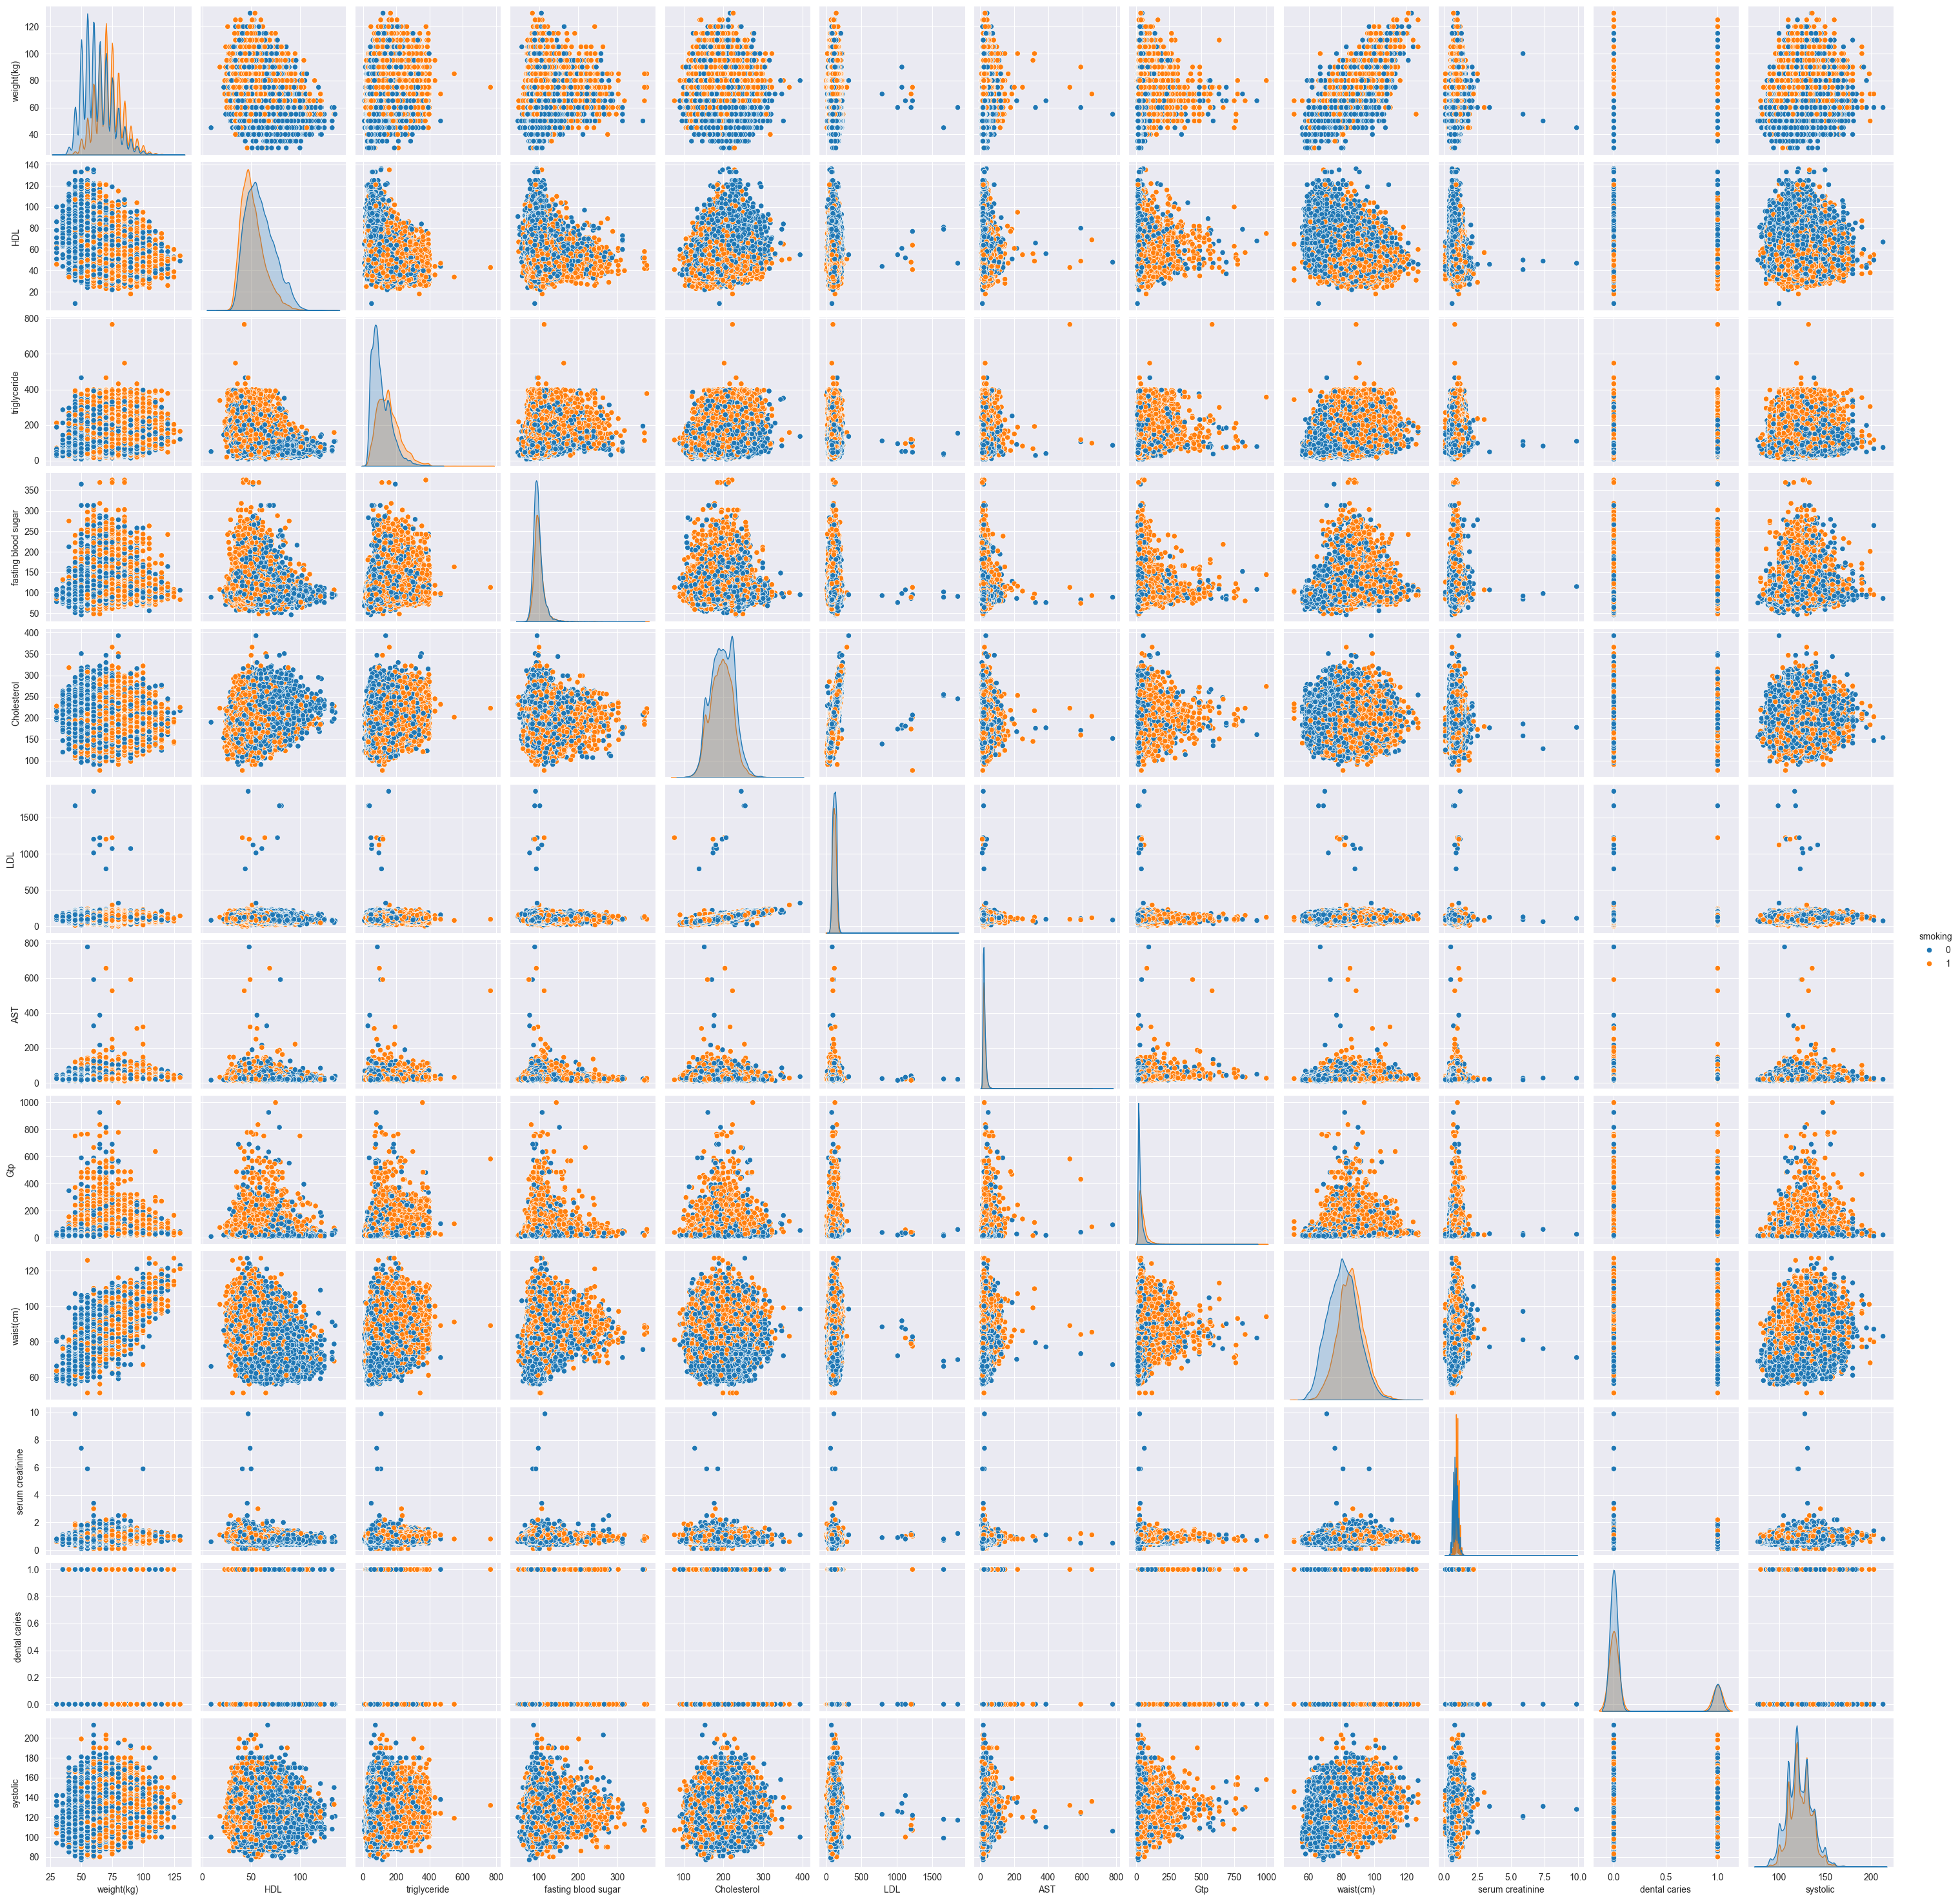

In [7]:
continuous_columns = columns.copy()
continuous_columns.remove("hearing(left)")
continuous_columns.remove("hearing(right)")
continuous_columns.remove("eyesight(left)")
continuous_columns.append("smoking")
sns.pairplot(all_data[continuous_columns], hue='smoking')